<a href="https://colab.research.google.com/github/PratyushKattel/DL_and_ML/blob/main/stop_before_its_too_late.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_circles
import seaborn as sns

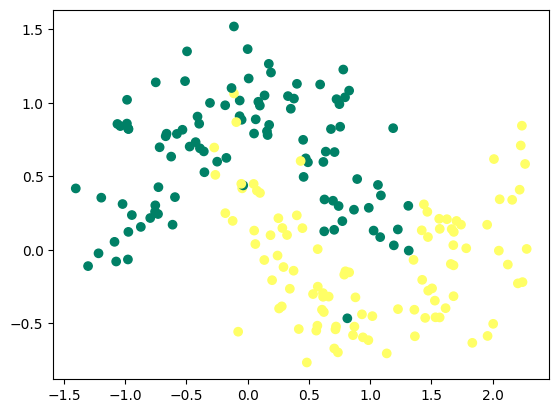

In [15]:
X,y=make_moons(n_samples=200,noise=0.25,random_state=101)
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)


In [17]:
model=Sequential()
model.add(Dense(100,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [21]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=0)

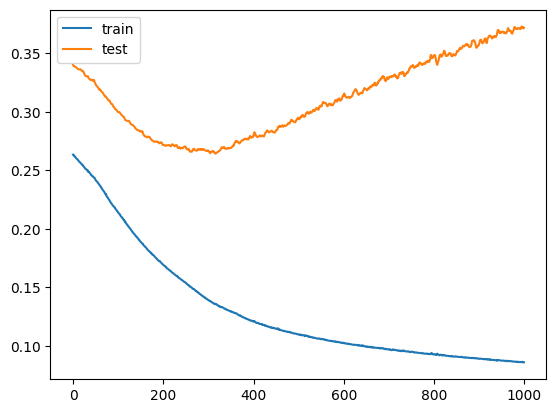

In [25]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

The validation loss is decreasing till epochs between 200 and 400 but goes on increasing. hence training must be stopped around 300 epochs for prevention of overfitting


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

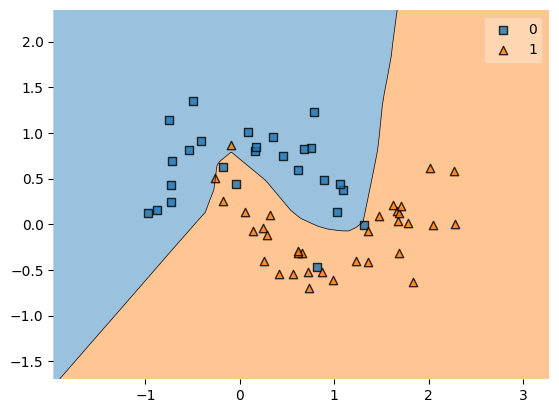

In [22]:
plot_decision_regions(X_test,y_test.ravel(),clf=model)

In [51]:
callback=EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=25,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

In [52]:
model2=Sequential()
model2.add(Dense(100,input_dim=2,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [53]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,verbose=1,callbacks=[callback])

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.3140 - loss: 0.7145 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5149 - loss: 0.6898 - val_accuracy: 0.7000 - val_loss: 0.6736
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8027 - loss: 0.6598 - val_accuracy: 0.8500 - val_loss: 0.6536
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8050 - loss: 0.6444 - val_accuracy: 0.8667 - val_loss: 0.6343
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8359 - loss: 0.6157 - val_accuracy: 0.8333 - val_loss: 0.6153
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8495 - loss: 0.5932 - val_accuracy: 0.8333 - val_loss: 0.5972
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8443 - loss: 0.5766 - val_accuracy: 0.8333 - val_loss: 0.5798
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8148 - loss: 0.5586 - val_accuracy: 0.8333 - 

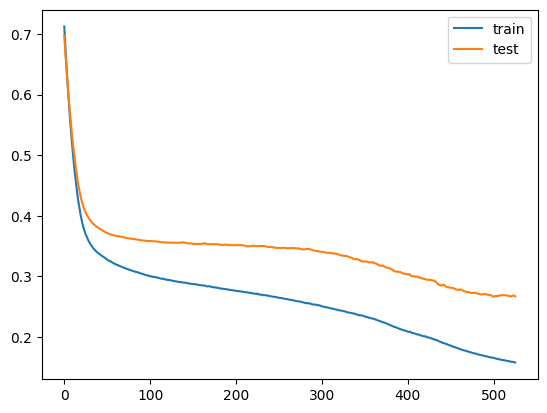

In [55]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='test')
plt.legend()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

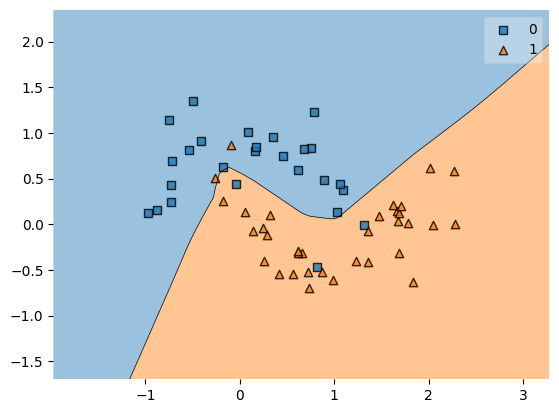

In [56]:
plot_decision_regions(X_test,y_test.ravel(),clf=model2)